# Project Linear Regression: Boston House Price Prediction


The project on Linear Regression with the Boston house price data

-------------------------------
## Problem Statement
-------------------------------

The problem on hand is to predict the housing prices of a town or a suburb based on the features of the locality provided. This process is to identify the most important features in the dataset, to employ techniques of data preprocessing and build a linear regression model that predicts the prices. 

----------------------------
## Data Information
---------------------------

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- **CRIM:**     per capita crime rate by town
- **ZN:**       proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:**    proportion of non-retail business acres per town
- **CHAS:**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:**      nitric oxides concentration (parts per 10 million)
- **RM:**       average number of rooms per dwelling
- **AGE:**     proportion of owner-occupied units built before 1940
- **DIS:**      weighted distances to five Boston employment centers
- **RAD:**      index of accessibility to radial highways
- **TAX:**      full-value property-tax rate per 10,000 dollars
- **PTRATIO:**  pupil-teacher ratio by town
- **LSTAT:**    %lower status of the population
- **MEDV:**     Median value of owner-occupied homes in 1000 dollars

### Import Libraries

In [2]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# import library for preparing data
from sklearn.model_selection import train_test_split

# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### Read the dataset

In [3]:
df = pd.read_csv("Boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Observations**
* The price of the house indicated by the variable MEDV is the target variable and the rest are the independent variables based on which we will predict house price.

### Get information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observations**
* There are a total of 506 non-null observations in each of the columns. This indicates that there are no missing values in the data.

* Every column in this dataset is numeric in nature.

### Check Statistics Summary

In [5]:
#write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Observations:
* **The variables CRIM is significantly positive-skewed.** This infers that most of the areas have very low crime rates (mean 3.61 vs 75% 3.68). It's either a very clear power-law distribution, or the max 88.98 shows the existence of the outlier which is very far away.
* **The variable ZN is significantly positive-skewed.** This looks like at least half (very likely the most) of residential plots are under the area of 25,000 sq. ft.
* **The variable INDUS is likely positive-skewed.** This suggests a positive skewness due to mean 11.1 vs 50% 9.7. The proportion of non-retail could refer to industrial usage.
* **The variable CHAS, potentially 2 possible values 0 and 1, supposedly follows a binomial distribution**, and the majority of the houses are defined as being away from Charles river (CHAS = 0 at even 75%).
* **The variable NOX, potentially a normal distribution**, and it looks like almost no skewness (mean 0.55 vs 50% 0.54).
* **The variable RM, potentially a normal distribution**, and it looks like almost no skewness (mean 6.28 vs 50% 6.21). If the definition of rooms includes restroom and living room, it could be pretty reasonable. 
* **The variable AGE is left-skewed** It also suggests that 75% of the houses are located in the area with at least 45% of the owner-occupied houses being built before 1940, which is 30 years old when it was 1970. 
* **The variable DIS could be potentially the power law distribution**, this variable means the average distances to five Boston employment centers. It looks like most of the houses are closer to these employment centers and a small amount of them are very far away. It's a positively skewed distribution.
* **The variables RAD is a discrete distribution and very positively skewed.**, RAD indicates the ability to access the railroad. It will need further investigation to see the real distribution. 
* **The variables TAX is a positively skewed distribution.**, According to the mean and the mean, the TAX is a very right-skewed distribution.
* **The variables LSTAT is a right-skewed distribution.**, According to the mean and the mean, the LSTAT is a very right-skewed distribution.
* **The variables MEDV is a right-skewed distribution.**, According to the mean and the mean, the MEDV, our target (or dependent variable) is a right-skewed distribution. 
* **The variables MEDV_log is a right-skewed distribution.**, According to the mean and the mean, the MEDV_log becomes a left-skewed distribution.**

Before performing the modeling, it is important to check the univariate distribution of the variables.

### Univariate Analysis

### Check the distribution of the variables

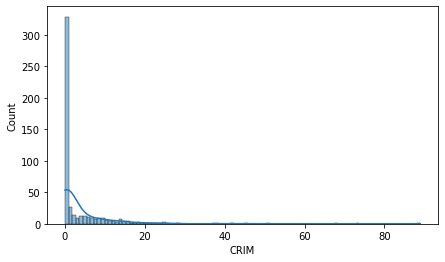

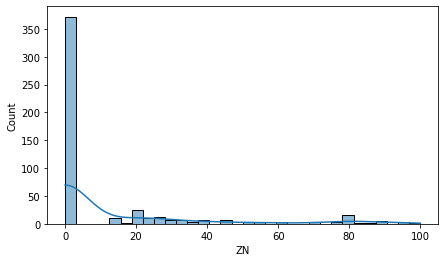

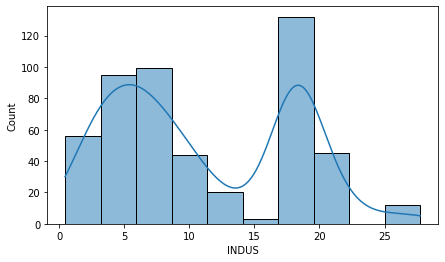

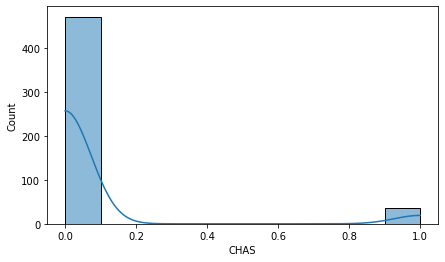

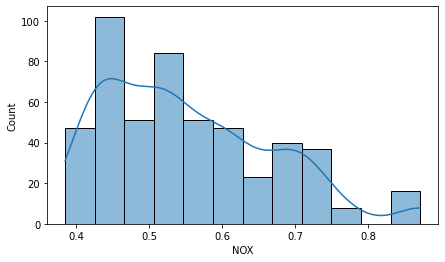

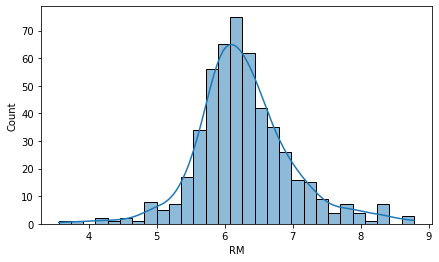

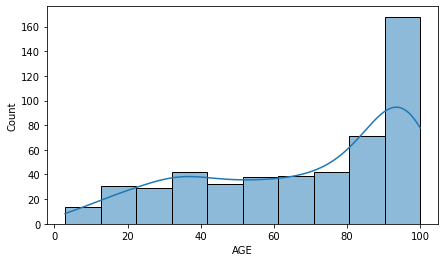

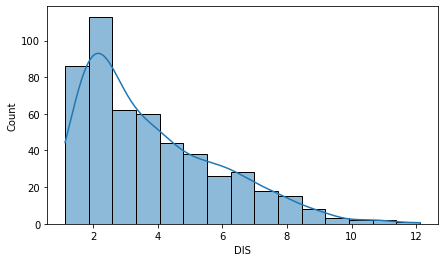

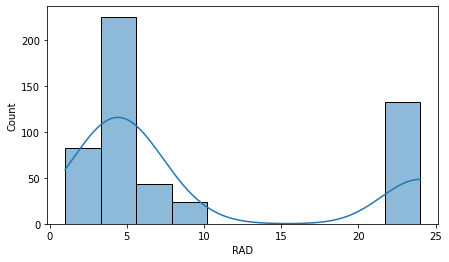

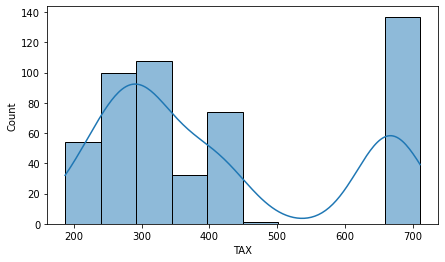

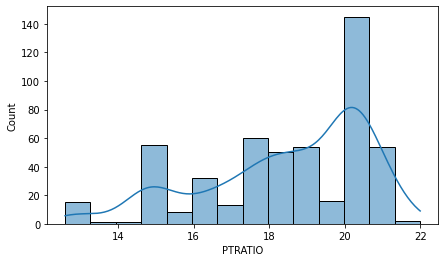

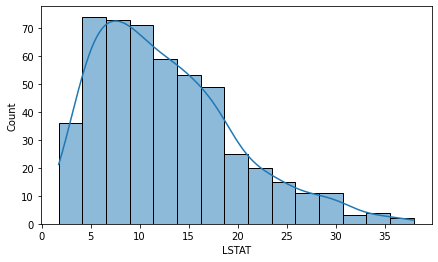

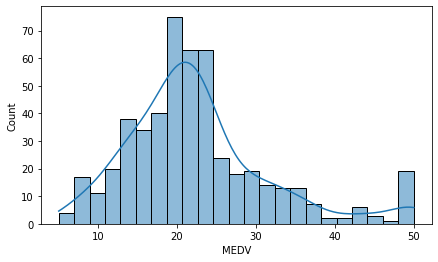

In [6]:
# let's plot all the columns to look at their distributions
for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i, kde = True)
    plt.show()

**Observations**
* **The variables CRIM and ZN are positively skewed.** This suggests that most of the areas have lower crime rates and most residential plots are under the area of 25,000 sq. ft.
* **The variable CHAS, with only 2 possible values 0 and 1, follows a binomial distribution**, and the majority of the houses are away from Charles river (CHAS = 0).
* The distribution of the variable AGE suggests that many of the owner-occupied houses were built before 1940. 
* **The variable DIS** (average distances to five Boston employment centers) **has a nearly exponential distribution**, which indicates that most of the houses are closer to these employment centers.
* **The variables TAX and RAD have a bimodal distribution.**, indicating that the tax rate is possibly higher for some properties which have a high index of accessibility to radial highways.  
* The dependent variable MEDV seems to be slightly right skewed.

As the dependent variable is sightly skewed, we will apply a **log transformation on the 'MEDV' column** and check the distribution of the transformed column.

In [7]:
df['MEDV_log'] = np.log(df['MEDV'])

<AxesSubplot:xlabel='MEDV_log', ylabel='Count'>

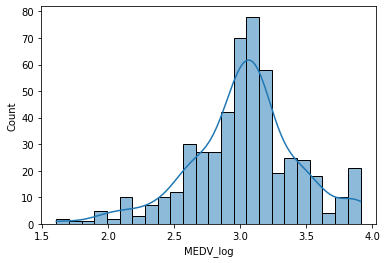

In [8]:
sns.histplot(data=df, x='MEDV_log', kde = True)

**Observations**
* The log-transformed variable (**MEDV_log**) appears to have a **nearly normal distribution without skew**, and hence we can proceed.

Before creating the linear regression model, it is important to check the bivariate relationship between the variables. Let's check the same using the heatmap and scatterplot.

### Bivariate Analysis

#### Let's check the correlation using the heatmap 

### **Question 2** (3 Marks):
- **Write the code to plot the correlation heatmap between the variables (1 Mark)**
- **Write your observations (2 Marks)**

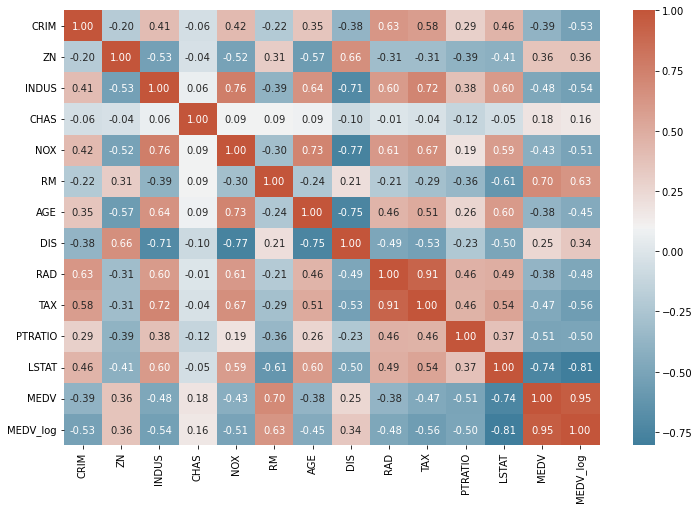

In [9]:
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=cmap ) #write your code here
plt.show()

**Observations:
* **7 significant correlation pairs: INDUS-TAX, INDUS-NOX, NOX-AGE, NOX-DIS, RM-MEDV, DIS-AGE, DIS-INDUS ** The absolute values of correlations coefficient are ranging between 0.7 and 0.8. Four pairs are positive relationship and the pairs of NOX-DIS, DIS-INDUS and DIS-AGE are negative relationship. Later on we may need to drop some of them to avoid multicollinearity. 
* **10 correlations pairs could be worthy for closer look: ZN-DIS, CRIM-ZN, INDUS-AGE, INDUS-LSTAT, NOX-RAD, NOX-TAX, RM-LSTAT, RM-MEDV_log, DIS-INDUS, AGE-LSTAT**, The absolute values of correlations coefficient are ranging between 0.6 and 0.7. All pairs are positive relationship.
* **CHAS almost has no significant relationship with any variables**, The absolute values of correlations coefficient from CHAS to anyone else is below 0.2.**


Now, we will visualize the relationship between the pairs of features having significant correlations.

### Visualizing the relationship between the features having significant correlations (> 0.7) 

### **Question 3** (6 Marks):
- **Create a scatter plot to visualize the relationship between the features having significant correlations (>0.7) (3 Marks)**
- **Write your observations from the plots (3 Marks)**

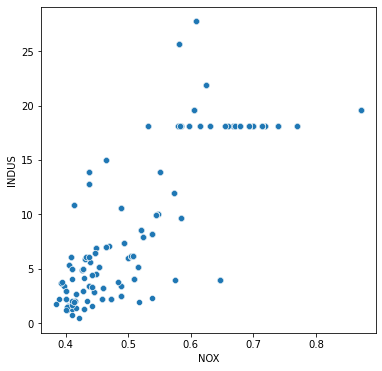

In [10]:
# scatterplot to visualize the relationship between NOX and INDUS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'NOX', y = 'INDUS', data = df) #write you code here
plt.show()

**Observations:
* The proportion of non-retail business acres per town (which may indicate the industrial business) increases clearly as the the nitric oxides increases in the town. It refers the more industrial business or factory, the more nitric oxides which matches our intution precisely.**

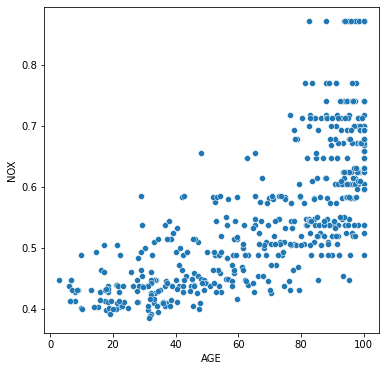

In [11]:
# scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'NOX', data = df) #Write your code here
plt.show()

**Observations:
* The nitric oxides increases significantly as the proportion of owner-occupied units built before 1940 increases. It refers the older the houses are, the more nitric oxides - it matches our intution which the older area could be more for doing the business which may generate more nitric oxides.**

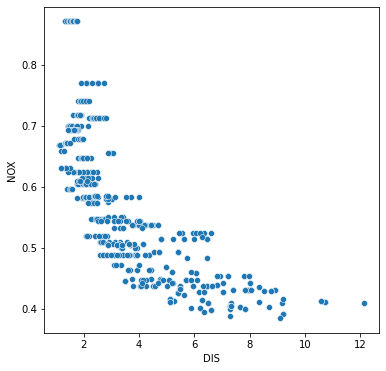

In [12]:
# scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'DIS', y = 'NOX', data = df) #Write your code here
plt.show()

**Observations:
* The nitric oxides increases significantly as the distance of the houses to the Boston employment centers decreases. Since the Boston employment centers could be non-retail oriented business - it matches our intution which the factory related business will generate more nitric oxides related gas.
 **

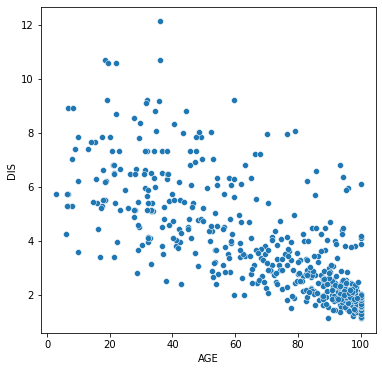

In [13]:
# scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'DIS', data = df)
plt.show()

**Observations:**
* The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. It is possible that the Boston employment centers are located in the established towns where proportion of owner-occupied units built prior to 1940 is comparatively high.

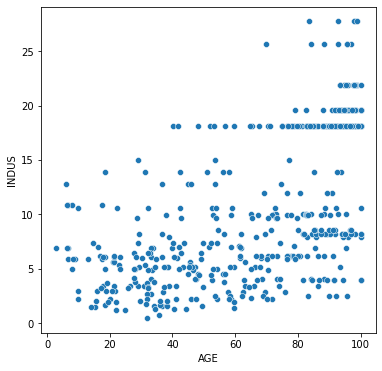

In [14]:
# scatterplot to visualize the relationship between AGE and INDUS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'INDUS', data = df)
plt.show()

**Observations:**
* No trend between the two variables is visible in the above plot.

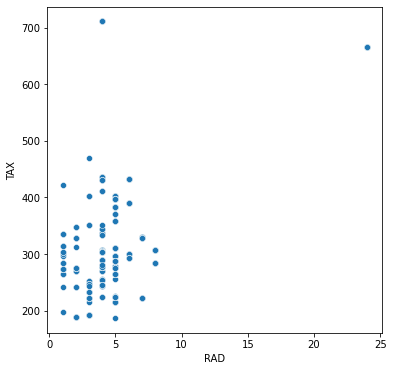

In [15]:
# scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RAD', y = 'TAX', data = df)
plt.show()

**Observations:**
* The correlation between RAD and TAX is very high. But, no trend is visible between the two variables. 
This might be due to outliers. 

Let's check the correlation after removing the outliers.

In [16]:
# remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]
# import the required function
from scipy.stats import pearsonr
# calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.249757313314292


So the high correlation between TAX and RAD is due to the outliers. The tax rate for some properties might be higher due to some other reason.

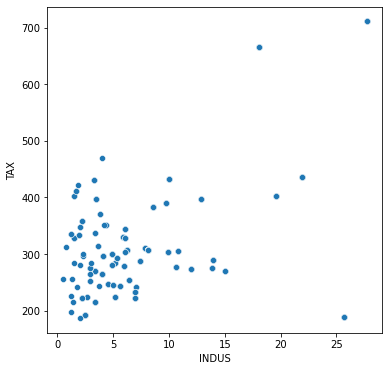

In [17]:
# scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)
plt.show()

**Observations:**
* The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

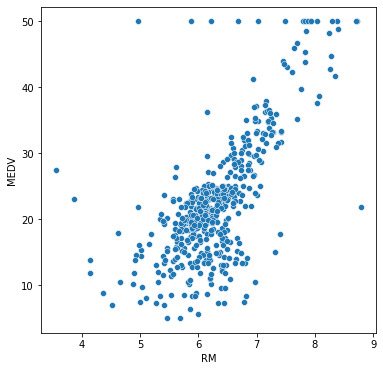

In [18]:
# scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RM', y = 'MEDV', data = df)
plt.show()

**Observations:**
* The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.

* There are a few outliers in a horizontal line as the MEDV value seems to be capped at 50.

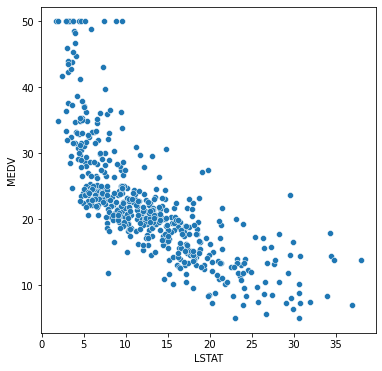

In [19]:
# scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)
plt.show()

**Observations:**
* The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.
* There are few outliers and the data seems to be capped at 50.

We have seen that the variables LSTAT and RM have a linear relationship with the dependent variable MEDV. Also, there are significant relationships among a few independent variables, which is not desirable for a linear regression model. Let's first split the dataset.

### Split the dataset
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [20]:
# separate the dependent and independent variable
Y = df['MEDV_log']
X = df.drop(columns = {'MEDV', 'MEDV_log'})

# add the intercept term
X = sm.add_constant(X)

In [21]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

Next, we will check the multicollinearity in the train dataset.

### Check for Multicollinearity

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped/treated till all the features have a VIF score < 5

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


**Observations:**
* There are two variables with a high VIF - RAD and TAX. Let's remove TAX as it has the highest VIF values and check the multicollinearity again.

#### **Question 4:** Drop the column 'TAX' from the training data and check if multicollinearity is removed? (1 Mark)

In [23]:
# create the model after dropping TAX
X_train = X_train.drop(columns = ['TAX'])#Write your code here

# check for VIF
print(checking_vif(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


Now, we will create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

#### **Question 5:** Write the code to create the linear regression model and print the model summary. Write your observations from the model. (3 Marks)

In [24]:
from sklearn.linear_model import LinearRegression

# create the model
model1 = LinearRegression() #write your code here
model1.fit(X_train, y_train)
model1 = sm.OLS(y_train, X_train).fit()

# get the model summary
model1.summary()

#print(lm1.summary())  #Inferential statistics
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          1.40e-101
Time:                        08:05:41   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.0

**Observations:
* **1. R-squared**: 0.769 is the first thing first we got from R-squared. It's good but with room to improve. AT least 77% of the data could be explained by this linear regression.
* **2. Adj. R-squared:** 0.761 is good, too. With Adj. R-squared is always smaller or equal to R-squared, this info seems right and appropriate. With the adjustment, it's not far. It looks like there's a potential at the end univariate could be already pretty powerful. We will investigate later.
* **3. P-value & coefficient**: We do see 3 p-values (ZN 0.155, INDUS -0.0004 & AGE 0.645) are larger than 0.05 and their coefficients are approaching zero (ZN 0.0010, INDUS 0.883 & AGE 0.0003). It's a great chance that we will drop all of them to improve the model.
* **4. NOX**: The coefficient is -1.056 which indicates a very high negative correlation with our target variable. It means the higher the nitric oxide value, the lower the log housing price. And the negative relationship is very strong but in the opposite direction.
* **5. CHAS**: The coefficient is 0.120 which indicates the 2nd most correlated independent variable. It means the closer the Charles River, the log the housing price goes up.**

#### **Question 6:** Drop insignificant variables from the above model and create the regression model again. (2 Marks)

### Examining the significance of the model

It is not enough to fit a multiple regression model to the data, it is necessary to check whether all the regression coefficients are significant or not. Significance here means whether the population regression parameters are significantly different from zero. 

From the above it may be noted that the regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.

In [25]:
# create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df dataframe
Y = df['MEDV_log']
X = df.drop(columns = ['MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS']) #write your code here
X = sm.add_constant(X)

#splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

# create the model
model2 = sm.OLS(y_train, X_train).fit() #write your code here

# get the model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          2.61e-104
Time:                        08:05:41   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.0

**Observations:**
* We can see that the **R-squared value has decreased by 0.002**, since we have removed variables from the model, whereas the **adjusted R-squared value has increased by 0.001**, since we removed statistically insignificant variables only.

Now, we will check the linear regression assumptions.

### Check the below linear regression assumptions

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

#### **Question 7:** Write the code to check the above linear regression assumptions and provide insights. (4 Marks)

#### Check for mean residuals

In [26]:
# Write your code here
residuals = model2.resid
residuals.mean()

-1.549921521948453e-15

**Observations:
* The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.**

#### Check for homoscedasticity

* Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.

* Heteroscedasticity - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

* We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [27]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [28]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 1.0835082923425279), ('p-value', 0.3019012006766915)]

**Observations:
* As we can see from the above test the p-value 0.3019 is greater than 0.05, so we fail to reject the null-hypothesis. That means - residuals are homoscedastic.**

#### Linearity of variables

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

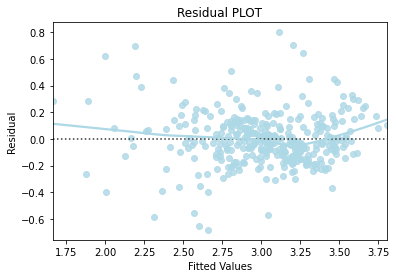

In [29]:
# predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color="lightblue", lowess=True) #write your code here
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

**Observations:
- We can see that there is no pattern in the residuals vs fitted values scatter plot now 
- The residuals "bounce randomly" around the 0 line. This suggests that the assumption that the relationship is linear is reasonable.
- The residuals roughly form a "horizontal band" around the 0 line. This suggests that the variances of the error terms are equal.
- The linearity assumption is satisfied.**

#### Normality of error terms
The residuals should be normally distributed.

Text(0.5, 1.0, 'Histogram of Residuals')

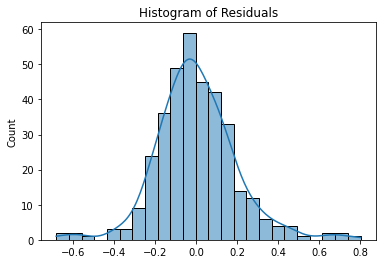

In [30]:
# Plot histogram of residuals
#write your code here
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')

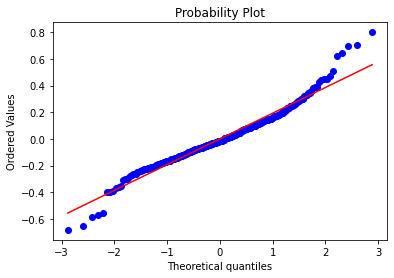

In [31]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

**Observations:
* This plot shows a chance that the middle part could be more concentrated a little bit more than Gaussian distribution. Otherwise, it's potentially a great symmetric normal distribution. **

### Check the performance of the model on the train and test data set

#### **Question 8:** Write your observations by comparing model performance of train and test dataset (2 Marks)

In [32]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)   

    Data      RMSE       MAE      MAPE
0  Train  0.195504  0.143686  4.981813
1   Test  0.198045  0.151284  5.257965


**Observations:
* **1. RMSE Train/Test**: 0.196/0.198 - Normally RMSE (Root Mean Square Error) value between 0.2 and 0.5 shows that the model can relatively predict the data accurately. Since our value of Train and Test set are both below 0.2, we believe our model is relatively accurate by RMSE measurement.
* **2. MAE Train/Test**: 0.144/0.151 - Normally MAE (Mean Absolute Error) could be good under 0.2. We believe our model is relatively accurate by MAE measurement.
* **3. MAPE Train/Test** : 4.981/5.268 - MAPE (Mean Absolute Percentage Error) >100% means that the errors are "much greater" then the actual values (e.g. actual is 1, you predict 6, so MAPE is 5). We may think our model is not good by MAPE measurement. However, MAPE has some drawback since it's percentage to compare. Our model to predict log housing price may not be good to use MAPE to measure. **

#### Apply cross validation to improve the model and evaluate it using different evaluation metrics

#### **Question 9:** Apply the cross validation technique to improve the model and evaluate it using different evaluation metrics. (1 Mark)

In [33]:
# import the required function

from sklearn.model_selection import cross_val_score

# build the regression model and cross-validate
linearregression = LinearRegression()                                    

#write your code here
cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)

cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error') #write your code here                                


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


**Observations**
- The R-squared on the cross validation is 0.729, whereas on the training dataset it was 0.769
- And the MSE on cross validation is 0.041, whereas on the training dataset it was 0.038

We may want to reiterate the model building process again with new features or better feature engineering to increase the R-squared and decrease the MSE on cross validation.

#### **Question 10:** Get model Coefficients in a pandas dataframe with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs. Write the regression equation. (2 Marks)

In [34]:
coef = model2.params #write your code here

In [35]:
# Let us write the equation of the fit
Equation = "log (Price) ="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (Price) =	( 4.649385823266638 ) *  const + ( -0.012500455079103887 ) *  CRIM + ( 0.1197731907701965 ) *  CHAS + ( -1.0562253516683255 ) *  NOX + ( 0.058906575109279824 ) *  RM + ( -0.044068890799405055 ) *  DIS + ( 0.00784847460624381 ) *  RAD + ( -0.048503620794999 ) *  PTRATIO + ( -0.029277040479796866 ) *  LSTAT + 

#### **Question 11:** Write the conclusions and business recommendations derived from the model. (5 Marks)

Write Conclusions here:

* **What we did in the modeling process** - We try to predict the 1970 housing prices of Boston based on the features of the locality provided to us. In the process, we successfully identify the most important feature as Nitric Oxide concentration value (parts per 10 million) from the 7 features in the regression model including the distance from the Charles River (CHAS), the per capital crime rate by town(CRIM), nitric oxides concentration (parts per 10 million, denoted as NOX here), an average number of rooms per dwelling (RM), the weighted distances to five Boston employment centers (DIS), the index of accessibility to radial highways(RAD) and the pupil-teacher ratio by town (PTRATIO) among the 12 features of the dataset. 

* **The performance from this model:** - According to the linear regression model we build, we predict the log of 1970 Boston housing prices based on the regression model with the 7 features. The performance is quite well according to MSE (Train/Test: 0.196/0.198) and MAE (Train/Test: 0.144/0.151) measurements low enough than 0.5. Both RSquared 0.729 (+/- 0.232)) and 0.041 (+/- 0.023) after cross-validation prove the performance quite well (RSquared higher enough than 0.7 and MSE lower enough than 0.5). This model is a trustable model with the power to predict.

* **The interpretation from this model:** - According to the model, Nitric Oxide concentration value plays as the top factor in a strongly (coefficient -1.056) negative direction to drive down the log of the housing price. Actually, the 2nd factor could positively raise the log of the Boston housing price with moderate (coefficient 0.12) influence. Though the following factors have separate directions either positive (the weighted distances to five Boston employment centers and the average number of rooms per dwelling) or negative impacts(the per capital crime rate by town, the index of accessibility to radial highways the pupil-teacher ratio by town), their influences are very limited for the result with the coefficient less than the absolute value of 0.06.**

Write Recommendations here:

* **Historical experiences** - What we could learn from the housing price linear regression model is to apply the similar status of the development stage, locality, and social-economical scenarios to predict the factors to consider and the features that could influence the housing price.

* **1970 Boston housing price experiences** - To apply the 1970 Boston housing price model, we should be careful to figure out the city with the
 * **1) Similar developmental stage** - Industrialization is still the key to the drive for the city's economic growth. Normally industrialization brings the negative impact of air pollution, specifically with a great amount of nitrogen dioxide since it comes from vehicles, power plants, industrial emissions, and off-road sources such as construction, lawn, and gardening equipment. All of these sources burn fossil fuels which are very toxic. The NO (Nitric Oxide) value could be a good index to predict the housing price in this scenario.
 * **2) Similar locality features** - A river passing by the city could be a key benefit for the city residents to offer the value of nature scenes and the easy access of the riverside facility. In reality, we have many metropolitan or cities/towns which have rivers passing by. It's always a good factor in the model prediction we can't miss.
 * **3) Overall housing price prediction model to apply somewhere else** While the strongest negative factor of NO and a moderate positive factor both influence the housing price, the rest of the factors become not that significant to contribute. It also tells us a story that in 1970 Boston, The focus is economic growth with a little bit better life as the reflection to consider housing. There could be limited or very focus factors to consider then in Boston housing price. It may or may not apply to the different timing and the location.**